In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 46.9 MB/s eta 0:00:00


In [4]:
# First import MarkovNetwork class from pgmpy.models
from pgmpy.models import MarkovNetwork
model = MarkovNetwork([('A', 'B'), ('B', 'C')])
model.add_node('D')
model.add_edges_from([('C', 'D'), ('D', 'A')])

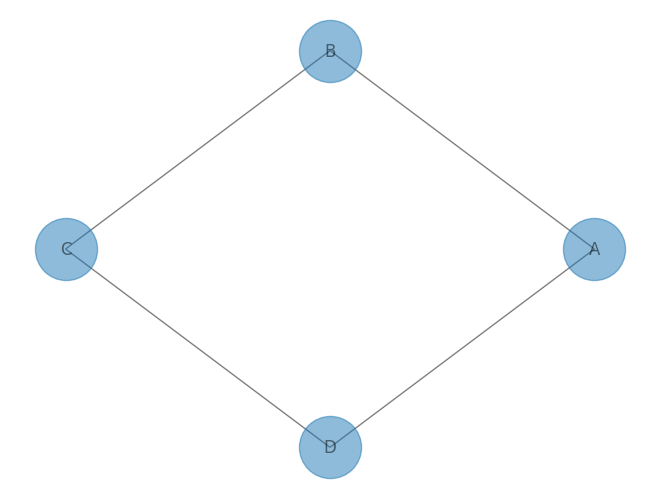

In [5]:
import networkx as nx
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [26]:
from pgmpy.factors.discrete import DiscreteFactor
factor_a_b = DiscreteFactor(variables=['A', 'B'],cardinality=[2, 2],values=[90, 100, 1, 10])
factor_b_c = DiscreteFactor(variables=['B', 'C'],cardinality=[2, 2],values=[10, 80, 70, 30])
factor_c_d = DiscreteFactor(variables=['C', 'D'],cardinality=[2, 2],values=[10, 1, 100, 90])
factor_d_a = DiscreteFactor(variables=['D', 'A'],cardinality=[2, 2],values=[80, 60, 20, 10])
product = factor_a_b * factor_b_c * factor_c_d * factor_d_a
product.normalize()
print(product) #observati concordanta cu ultimul tabel (ordinea e schimbata)

+------+------+------+------+----------------+
| A    | C    | B    | D    |   phi(A,C,B,D) |
+======+======+======+======+================+
| A(0) | C(0) | B(0) | D(0) |         0.0066 |
+------+------+------+------+----------------+
| A(0) | C(0) | B(0) | D(1) |         0.0002 |
+------+------+------+------+----------------+
| A(0) | C(0) | B(1) | D(0) |         0.0511 |
+------+------+------+------+----------------+
| A(0) | C(0) | B(1) | D(1) |         0.0013 |
+------+------+------+------+----------------+
| A(0) | C(1) | B(0) | D(0) |         0.5261 |
+------+------+------+------+----------------+
| A(0) | C(1) | B(0) | D(1) |         0.1184 |
+------+------+------+------+----------------+
| A(0) | C(1) | B(1) | D(0) |         0.2192 |
+------+------+------+------+----------------+
| A(0) | C(1) | B(1) | D(1) |         0.0493 |
+------+------+------+------+----------------+
| A(1) | C(0) | B(0) | D(0) |         0.0001 |
+------+------+------+------+----------------+
| A(1) | C(0)

In [22]:
model.add_factors(factor_a_b, factor_b_c,factor_c_d, factor_d_a)
model.get_factors()

[<DiscreteFactor representing phi(A:2, B:2) at 0x7bc623c5e7b0>,
 <DiscreteFactor representing phi(B:2, C:2) at 0x7bc623d0c740>,
 <DiscreteFactor representing phi(C:2, D:2) at 0x7bc623d0e690>,
 <DiscreteFactor representing phi(D:2, A:2) at 0x7bc623be6180>]

In [ ]:
model.get_local_independencies()

(A ⟂ C | B, D)
(B ⟂ D | A, C)
(C ⟂ A | B, D)
(D ⟂ B | C, A)

In [ ]:
from pgmpy.inference import BeliefPropagation
bp_infer = BeliefPropagation(model)
marginals = bp_infer.map_query(variables=['A','B','C','D'])
print(marginals)

{'A': 0, 'B': 0, 'C': 1, 'D': 0}


In [27]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
distribution = infer.query(variables=['A','B','C','D'])
distribution.normalize()
print(distribution)

+------+------+------+------+----------------+
| A    | B    | C    | D    |   phi(A,B,C,D) |
+======+======+======+======+================+
| A(0) | B(0) | C(0) | D(0) |         0.0066 |
+------+------+------+------+----------------+
| A(0) | B(0) | C(0) | D(1) |         0.0002 |
+------+------+------+------+----------------+
| A(0) | B(0) | C(1) | D(0) |         0.5261 |
+------+------+------+------+----------------+
| A(0) | B(0) | C(1) | D(1) |         0.1184 |
+------+------+------+------+----------------+
| A(0) | B(1) | C(0) | D(0) |         0.0511 |
+------+------+------+------+----------------+
| A(0) | B(1) | C(0) | D(1) |         0.0013 |
+------+------+------+------+----------------+
| A(0) | B(1) | C(1) | D(0) |         0.2192 |
+------+------+------+------+----------------+
| A(0) | B(1) | C(1) | D(1) |         0.0493 |
+------+------+------+------+----------------+
| A(1) | B(0) | C(0) | D(0) |         0.0001 |
+------+------+------+------+----------------+
| A(1) | B(0)